# PHYS414 Final Project
### Melih Kayra Kadıoğlu
### 82985

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp               # ODE solver

### Newtonian Approach
---------------------------------------------------------------------------------------------------------------------------------------

### a.1: Derivation of Lane Emden Equation

We can start from Newtonian hydrostatic equilibrium and mass conservation given in the introduction:
$$
\frac{dm}{dr}=4\pi r^2\rho(r),
\qquad
\frac{dP}{dr}=-\frac{Gm(r)\rho(r)}{r^2}
$$
Since we do not have the information for the density funcitoun, as suggested, we will use a polytropic equation of state (EOS) of such that
$$
P=K\rho^{\gamma}=K\rho^{1+\frac{1}{n}}
$$

Let us define the dimensionless variables
$$
\rho(r)=\rho_c\,\theta(\xi)^n,
\qquad
r=a\,\xi,
\qquad
P(r)=K\rho_c^{1+\frac1n}\,\theta(\xi)^{n+1}
$$
where $\rho_c=\rho(0)$ and $a$ is a constant to be chosen.

Then, 
$$
\frac{dP}{dr}
=K\rho_c^{1+\frac1n}(n+1)\theta^n\frac{d\theta}{dr}
$$
Let us substitute this into hydrostatic equilibrium:
$$
K\rho_c^{1+\frac1n}(n+1)\theta^n\frac{d\theta}{dr}
=
-\frac{Gm\rho_c\theta^n}{r^2}
$$
Now, cancel $\rho_c\theta^n$ to obtain
$$
K(n+1)\rho_c^{\frac1n}\frac{d\theta}{dr}
=
-\frac{Gm}{r^2},
\qquad\Rightarrow\qquad
m(r)=-\frac{K(n+1)\rho_c^{1/n}}{G}\,r^2\frac{d\theta}{dr}
$$
Differentiate this expression and use $\frac{dm}{dr}=4\pi r^2\rho_c\theta^n$:
$$
-\frac{K(n+1)\rho_c^{1/n}}{G}\frac{d}{dr}\!\left(r^2\frac{d\theta}{dr}\right)
=
4\pi r^2\rho_c\theta^n
$$
Divide by $r^2$:
$$
\frac{1}{r^2}\frac{d}{dr}\!\left(r^2\frac{d\theta}{dr}\right)
=
-\frac{4\pi G\rho_c}{K(n+1)\rho_c^{1/n}}\,\theta^n
=
-\frac{4\pi G}{K(n+1)}\,\rho_c^{1-\frac1n}\,\theta^n
$$

Now switch to $\xi$ using $r=a\xi$:
$$
\frac{1}{r^2}\frac{d}{dr}\!\left(r^2\frac{d\theta}{dr}\right)
=
\frac{1}{a^2}\frac{1}{\xi^2}\frac{d}{d\xi}\!\left(\xi^2\frac{d\theta}{d\xi}\right)
$$
Choose $a$ such that
$$
a^2=\frac{(n+1)K}{4\pi G}\,\rho_c^{\frac1n-1}
$$
Then we can get the Lane-Emden equation
$$
\boxed{
\frac{1}{\xi^2}\frac{d}{d\xi}\!\left(\xi^2\frac{d\theta}{d\xi}\right)+\theta^n=0
}
$$
Regularity at the center implies
$$
\theta(0)=1,
\qquad
\theta'(0)=0.
$$

### a.2: Regular solution at the center

To find out the series solution of the regular equation's behaviour at the center, assume an even-power series near $\xi=0$:
$$
\theta(\xi)=1+a\xi^2+b\xi^4+\mathcal O(\xi^6).
$$
Compute
$$
\frac{1}{\xi^2}\frac{d}{d\xi}\!\left(\xi^2\theta'\right)
=6a+20b\xi^2+\mathcal O(\xi^4),
$$
and
$$
\theta^n
=\left(1+a\xi^2+b\xi^4+\cdots\right)^n
=1+na\xi^2+\mathcal O(\xi^4).
$$
Substitute into Lane-Emden:
$$
(6a+20b\xi^2+\cdots)+(1+na\xi^2+\cdots)=0.
$$
Matching coefficients gives
$$
6a+1=0 \Rightarrow a=-\frac16,
\qquad
20b+na=0 \Rightarrow b=\frac{n}{120}.
$$
Hence the regular solution behaves as
$$
\boxed{
\theta(\xi)=1-\frac{1}{6}\xi^2+\frac{n}{120}\xi^4+\cdots
}
$$
and in particular $\theta'(0)=0$.

For $n=1$ the Lane-Emden equation becomes
$$
\frac{1}{\xi^2}\frac{d}{d\xi}\!\left(\xi^2\theta'\right)+\theta=0
\quad\Longleftrightarrow\quad
\theta''+\frac{2}{\xi}\theta'+\theta=0.
$$
The regular solution satisfying $\theta(0)=1$ and $\theta'(0)=0$ is
$$
\boxed{
\theta(\xi)=\frac{\sin\xi}{\xi}
}
$$
Furthermore,
$$
\lim_{\xi\to 0}\frac{\sin\xi}{\xi}=1,
\qquad
\theta'(\xi)=\frac{\xi\cos\xi-\sin\xi}{\xi^2}
\Rightarrow
\theta'(0)=0
$$
The first zero occurs at $\xi_1=\pi$ so the stellar surface is at $\theta(\pi)=0$.

### a.3: Derivation of the mass formula

We will use the Lane-Emden substitutions that we had before
$$
\rho(r)=\rho_c\,\theta(\xi)^n,\qquad r=a\,\xi,\qquad R=a\,\xi_n,\qquad \theta(\xi_n)=0
$$
where $\xi_n$ is the first zero of $\theta$.

The enclosed mass is
$$
m(r)=\int_0^r 4\pi r'^2\rho(r')\,dr'
=4\pi \rho_c \int_0^{a\xi} r'^2 \theta\!\left(\frac{r'}{a}\right)^n dr'
$$
Let $r'=a\xi'$ so that $dr'=a\,d\xi'$ and $r'^2=a^2\xi'^2$:
$$
m(\xi)=4\pi\rho_c a^3\int_0^\xi \xi'^2 \theta(\xi')^n\,d\xi'
$$
Hence the total mass is
$$
M=m(\xi_n)=4\pi\rho_c a^3\int_0^{\xi_n}\xi^2\theta(\xi)^n\,d\xi
$$

Now, start from the Lane-Emden equation such that
$$
\frac{1}{\xi^2}\frac{d}{d\xi}\!\left(\xi^2\theta'\right)+\theta^n=0
\quad\Longrightarrow\quad
\frac{d}{d\xi}\!\left(\xi^2\theta'\right)=-\xi^2\theta^n
$$
Integrate from $0$ to $\xi_n$:
$$
\left[\xi^2\theta'(\xi)\right]_0^{\xi_n}=-\int_0^{\xi_n}\xi^2\theta(\xi)^n\,d\xi
$$
Regularity at the center implies that $\xi^2\theta'(\xi)\to 0$ as $\xi\to 0$, so
$$
\int_0^{\xi_n}\xi^2\theta(\xi)^n\,d\xi = -\xi_n^2\theta'(\xi_n)
$$
Therefore,
$$
M=4\pi\rho_c a^3\left[-\xi_n^2\theta'(\xi_n)\right]
$$
By using $a=R/\xi_n$, resuly yields:
$$
\boxed{
M = 4\pi\rho_c R^3\left(-\frac{\theta'(\xi_n)}{\xi_n}\right)
}
$$

### a.4: Proof that mass is a function of radius

For a polytrope $P=K\rho^{1+1/n}$ one has
$$
a^2=\frac{(n+1)K}{4\pi G}\,\rho_c^{\frac1n-1}
$$
Hence
$$
R=a\xi_n
=\xi_n\left(\frac{(n+1)K}{4\pi G}\right)^{1/2}\rho_c^{\frac{1-n}{2n}}
\quad\Rightarrow\quad
\rho_c=
\left[\frac{R}{\xi_n}\left(\frac{4\pi G}{(n+1)K}\right)^{1/2}\right]^{\frac{2n}{1-n}}
\qquad (n\neq 1)
$$
Insert this into $M=4\pi\rho_c R^3\left(-\theta'(\xi_n)/\xi_n\right)$ to get
$$
\boxed{
M \propto R^{\frac{3-n}{1-n}}
\qquad (n\neq 1)
}
$$

Define the Lane-Emden constant
$$
\omega_n\equiv -\xi_n^2\theta'(\xi_n) \;>\;0.
$$
Then, a convenient explicit proportionality constant is
$$
\boxed{
M
=
4\pi\,\omega_n\,
\xi_n^{-\frac{3-n}{1-n}}
\left(\frac{(n+1)K}{4\pi G}\right)^{\frac{n}{\,n-1\,}}
R^{\frac{3-n}{1-n}}
\qquad (n\neq 1)
}
$$

### b.1: White Dwarf's Mass-Radius relation

Surface gravity:
$$g = \dfrac{G M}{R^2}$$

Solve for radius:
$$R = \sqrt{\dfrac{G M}{g}}$$

The data gives $\log_{10}(g)$ in CGS, so:
$$g = 10^{\log g} ;; [\mathrm{cm,s^{-2}}]$$

Mass is in solar masses:
$$M = \left(\dfrac{M}{M_\odot}\right) M_\odot$$

Thus in CGS:
$$R = \sqrt{\dfrac{G_{\mathrm{cgs}} , (M/M_\odot) , M_\odot}{10^{\log g}}}$$

Convert to Earth radii:
$$\dfrac{R}{R_\oplus} = \dfrac{1}{R_\oplus}\sqrt{\dfrac{G_{\mathrm{cgs}} , (M/M_\odot) , M_\odot}{10^{\log g}}}$$

Constants (CGS):
$$G_{\mathrm{cgs}} = 6.67430\times 10^{-8},\mathrm{cm^3,g^{-1},s^{-2}}$$

$$M_\odot = 1.98847\times 10^{33},\mathrm{g}$$

$$R_\oplus = 6.371\times 10^{8},\mathrm{cm}$$

Therefore, the final form of the formula is:
$$\displaystyle R_{R_\oplus} = \frac{1}{R_\oplus}\sqrt{\frac{G_{\mathrm{cgs}} M_\odot}{10^{\log g}} , M_{\rm WD}}$$
where $M_{\rm WD}$ is the mass column in solar masses.

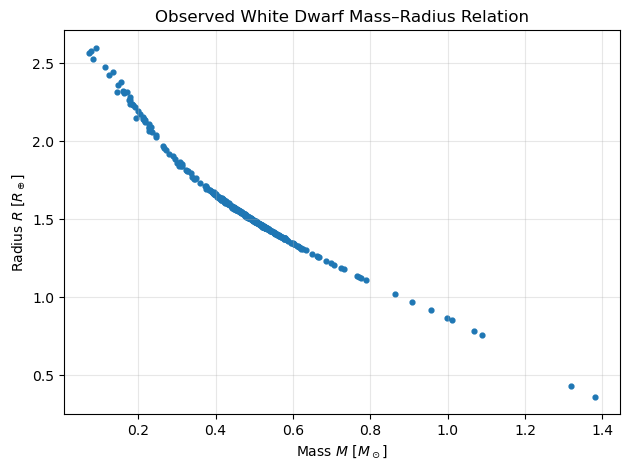

In [ ]:
# constants in CGS
G = 6.67430e-8
M_sun = 1.98847e33
R_earth = 6.371e8

# read data 
data = pd.read_csv("white_dwarf_data.csv")

mass_col = [c for c in data.columns if "mass" in c.lower()][0]
logg_col = [c for c in data.columns if "log" in c.lower()][0]

M = pd.to_numeric(data[mass_col], errors="coerce").to_numpy()      # [M_sun]
logg = pd.to_numeric(data[logg_col], errors="coerce").to_numpy()  # log10(g)

valid = np.isfinite(M) & np.isfinite(logg)
M = M[valid]
logg = logg[valid]

# Newtonian radius from log g
g = 10.0**logg                              # cm/s^2
R_cgs = np.sqrt(G * M * M_sun / g)          # cm
R_Rearth = R_cgs / R_earth                 # Earth radii

#plot M vs R
plt.figure()
plt.scatter(M, R_Rearth, s=12)
plt.xlabel(r"Mass $M$ [$M_\odot$]")
plt.ylabel(r"Radius $R$ [$R_\oplus$]")
plt.title("Observed White Dwarf Mass–Radius Relation")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()